# Dados Qualitativos

In [2]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import *
import numpy as np

#from statsmodels.formula.api import *

#from nltk.probability import FreqDist

dataset = pd.read_csv('dataset/qualitativos/reclamacoes_2018-03.csv',sep=';',encoding='latin1') # Setando o delimitador e a linguagem

dataset.head(4)# Mostrar apenas a quantidade de linhas informadas (Quando informado)


,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,SE,SP,Jacareí,M,entre 21 a 30 anos,16/03/2018,8.0,Mercado Livre,Comércio Eletrônico,Produtos de Telefonia e Informática,"Acessórios e periféricos (monitor, impressora,...",Entrega do Produto,Não entrega / demora na entrega do produto,Internet,S,S,Finalizada avaliada,Resolvida,5.0,1
1,CO,DF,Brasília,M,entre 21 a 30 anos,16/03/2018,10.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Internet Fixa,Cobrança / Contestação,Cobrança em duplicidade / Cobrança referente a...,Internet,S,S,Finalizada avaliada,Resolvida,4.0,1
2,SE,SP,São Paulo,F,entre 61 a 70 anos,21/03/2018,2.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pós-paga,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,1
3,SE,MG,Juatuba,M,entre 21 a 30 anos,19/03/2018,0.0,Serasa Experian,Bancos de Dados e Cadastros de Consumidores,Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Informação,"Dados pessoais ou financeiros consultados, col...",Internet,N,S,Finalizada avaliada,Resolvida,5.0,1


## Lista completa ordenada pela ocorrencia dos dados

In [4]:
#from collections import Counter
#coluna = 'Segmento de Mercado'
coluna = 'Área'
data = dataset[coluna]
#print(lista)
#print(Counter(lista).most_common(len(lista)))

#reclamacoes.columns # Retorna o nome das colunas

# Tipos de amostra

## Amostragem Inteiramente Aleatória

In [5]:
import random

aleatoria = []
QUANTIDADE = 25 # Quantidade da amostra
TAMANHO_LISTA = len(data)

numeros_aleatorios = random.sample(range(1,TAMANHO_LISTA), QUANTIDADE)

for i in numeros_aleatorios:
    aleatoria.append(data[i])

#print(aleatoria)

df = pd.DataFrame(aleatoria, columns=['Servico'])
df.to_csv('dataset_gerados/tabela_servicos.csv')
df
#print(Counter(amostragem).most_common(len(amostragem))) # Retorna os termos mais frequentes

,Servico
0,Demais Produtos
1,Telecomunicações
2,Demais Produtos
3,Serviços Financeiros
4,Produtos Eletrodomésticos e Eletrônicos
5,Telecomunicações
6,Telecomunicações
7,Telecomunicações
8,Telecomunicações
9,Telecomunicações


## Amostragem Sistematica

In [6]:
import random

sistematica = []
QNT_AMOSTRA = 300

# Sorteando o ponto de partida da amostragem de acordo com a quantidade de amostra desejada
inicio_aleatorio = random.randint(1, QNT_AMOSTRA)
tamanho_lista = data.count()
INTERVALO = int(tamanho_lista / QNT_AMOSTRA)

print("Inicio: %d" % inicio_aleatorio)
print("Tamanho : %d" % tamanho_lista)
print("Intervalo: ", INTERVALO)

sistematica = data[inicio_aleatorio::INTERVALO]
#print(sistematica)
sistematica.append(data[0::INTERVALO])

sistematica

Inicio: 205
Tamanho : 48702
Intervalo:  162


205                             Telecomunicações
367                             Telecomunicações
529                                  Transportes
691                             Telecomunicações
853                              Turismo/Viagens
1015                        Serviços Financeiros
1177                        Serviços Financeiros
1339                            Telecomunicações
1501                        Serviços Financeiros
1663                            Telecomunicações
1825                        Serviços Financeiros
1987                            Telecomunicações
2149                            Telecomunicações
2311                        Serviços Financeiros
2473                            Telecomunicações
2635                            Telecomunicações
2797                        Serviços Financeiros
2959                             Demais Produtos
3121                        Serviços Financeiros
3283                        Serviços Financeiros
3445                

## Amostragem Estratificado

In [38]:
from collections import Counter

tabela_frequencia_populacional = Counter(data).most_common(len(data))

# Quantidade da amostra
AMOSTRA = 350


TAMANHO_DADOS = data.count()
porcetagem = (AMOSTRA /  TAMANHO_DADOS)
print("Porcetagem: ", porcetagem)

df = pd.DataFrame(tabela_frequencia_populacional, columns=['Servico','Quantidade'])
#df.to_csv('dataset_gerados/tabela_frequencia_populacional.csv')
df['Quant. da Amostra'] = df['Quantidade'] * porcetagem
df = df.round({'Quant. da Amostra': 0})

df

Porcetagem:  0.007186563180156872


,Servico,Quantidade,Quant. da Amostra
0,Telecomunicações,17507,126.0
1,Serviços Financeiros,16823,121.0
2,Produtos de Telefonia e Informática,4688,34.0
3,Demais Produtos,2781,20.0
4,Produtos Eletrodomésticos e Eletrônicos,2333,17.0
5,Transportes,2188,16.0
6,Demais Serviços,1144,8.0
7,"Água, Energia, Gás",575,4.0
8,Saúde,288,2.0
9,Turismo/Viagens,228,2.0


## Tabelas

In [36]:
from collections import Counter

#lista = celulares['Marca']
#lista = celulares['Marca'].value_counts()
#lista

#celulares = pd.read_csv('bases/celulares.csv',encoding='latin1')

tabela_frequencia = Counter(aleatoria).most_common(len(aleatoria))
#tabela_frequencia = Counter(celulares).most_common(len(celulares))

df = pd.DataFrame(tabela_frequencia, columns=['Servico','Quantidade'])
df.to_csv('dataset_gerados/tabela_frequencia_servicos.csv')
df

# Descrição dos dados
#df.describe()


,Servico,Quantidade
0,Telecomunicações,15
1,Serviços Financeiros,5
2,Produtos Eletrodomésticos e Eletrônicos,3
3,Demais Produtos,2


## Gráficos

### Gráfico de Coluna

Text(0,0.5,'Quantidade')

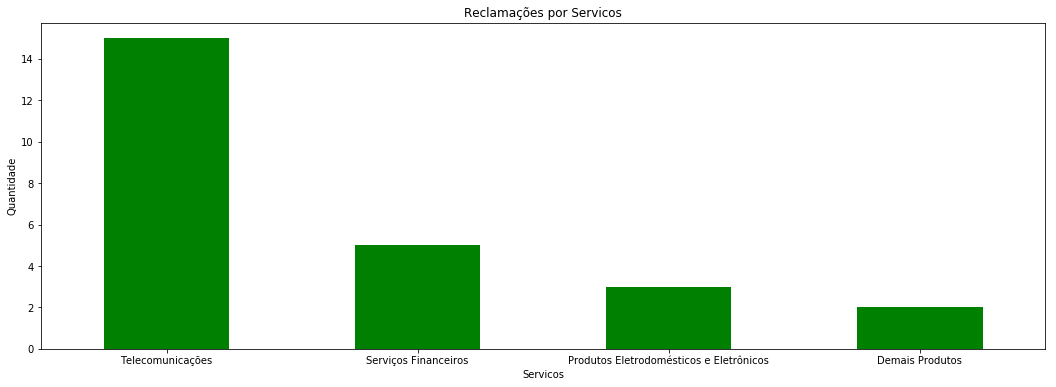

In [37]:
servicos = pd.read_csv('dataset_gerados/tabela_servicos.csv',encoding='utf-8')

grafico_coluna = servicos['Servico'].value_counts().plot(kind='bar',figsize=(18,6), grid = False, rot = 0, color='green')
plt.title('Reclamações por Servicos')
plt.xlabel('Servicos')
plt.ylabel('Quantidade')
#plt.show()

### Gráfico de Barra

<IPython.core.display.Javascript object>


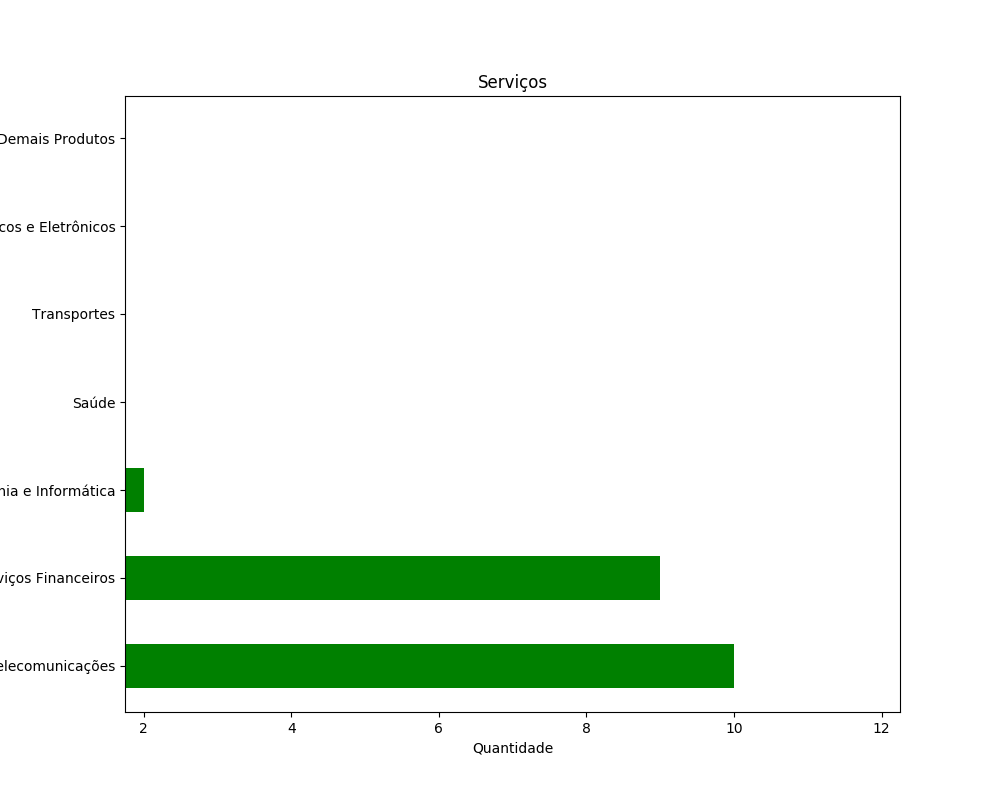

In [56]:
grafico_barra = servicos['Servico'].value_counts().plot(kind='barh',figsize=(10,8), grid = False, rot = 0, color='green')
plt.title('Serviços')
plt.xlabel('Quantidade')
plt.ylabel('Área')
plt.show()

### Gráfico de Pizza

<IPython.core.display.Javascript object>


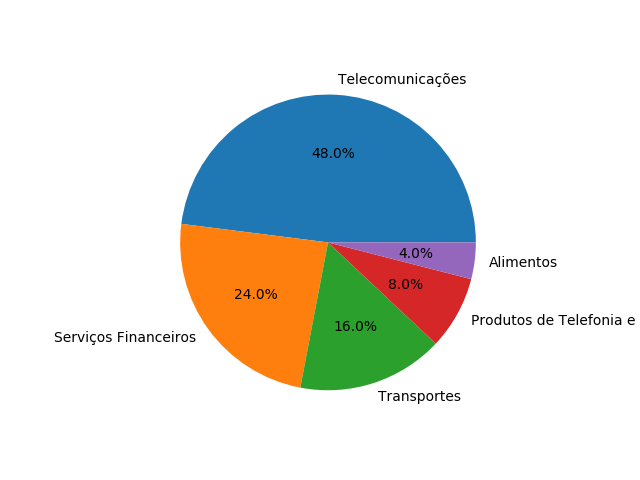

In [46]:
from matplotlib.gridspec import GridSpec

grafico_pizza_df = pd.read_csv('dataset_gerados/tabela_frequencia_servicos.csv',sep=',',encoding='utf-8')
#print(df)

the_grid = GridSpec(1, 1)

labels = grafico_pizza_df['Servico']
fracs = grafico_pizza_df['Quantidade']

plt.subplot(the_grid[0, 0], aspect=1)

plt.pie(fracs, labels=labels, autopct='%1.1f%%')
#plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

plt.show()

### Gráfico Polar

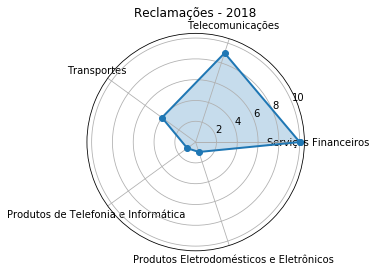

In [23]:
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
import numpy as np
#!pip install seaborn
import seaborn as sns

#df=pd.read_csv("Pokemon.csv")

#df2=pd.read_csv("bases/aulas/tabela_frequencia_estados.csv")

# Pegando a linha com os labels
labels = list(df['Servico'])

# Pegando os valores correspondentes aos labels
stats = list(df['Quantidade'])

# Usado para selecionar valores de uma determinada linha
# labels=np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
# stats = df.loc [ 386 , labels] .values

# Gerando os angulos
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)# Set the angle

# Usado para criar uma area fechada para o gráfico polar
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)   # Definindo o eixo axial
ax.plot(angles, stats, 'o-', linewidth=2)  # Desenhando o gráfico
ax.fill(angles, stats, alpha=0.25)  # Procurar a area
ax.set_thetagrids(angles * 180/np.pi, labels)  # Definindo o rótulo para cada eixo do gráfico
ax.set_title("Reclamações - 2018") # Titulo do gráfico
#ax.set_title([df.loc[386,"Name"]])  # Set the pokemon's name as the title

#ax.set_rlim(0,250) # Setar valor maximo para valores dos circulos
ax.grid(True)